# 사고가 자주 발생하는 도로의 특성은 무엇일까?

가설
- 오르막길보다는 내리막길이 과속하기가 쉬워서 사고가 더 자주 발생할 것이다
- 커브없이 직선길이가 긴 도로의 경우 마찬가지로 과속하기가 쉽다
- 터널이나 교량처럼 일반도로와는 상황이 달라지는 경우

In [2]:
#-*- coding: utf-8 -*-

# 공통
import numpy as np
import os
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "traffic_accident_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 데이터셋 저장 경로
ACCIDENT_PATH = "../9th_week/교통사망사고정보"
SUPPLEMENT_PATH = "../9th_week/보조데이터/03.서울시 도로 링크별 교통 사고발생 수"                

In [3]:
def load_accident_data(accident_path=ACCIDENT_PATH):
    csv_path = os.path.join(accident_path, "Kor_Train_교통사망사고정보(12.1~17.6).csv")
    return pd.read_csv(csv_path, encoding='euc-kr')    

In [4]:
train = load_accident_data()

In [5]:
train['발생지'] = train['발생지시도'] + train['발생지시군구']

train['발생지'].value_counts()

경남창원시(통합)    433
충북청주시        367
경북경주시        355
경기화성시        327
경기평택시        321
충남천안시        316
전북전주시        309
경기용인시        297
경기고양시        296
제주제주시        293
경기수원시        276
경남김해시        256
경북포항시        251
전남여수시        241
경기안산시        240
경북구미시        235
충남아산시        232
경기성남시        231
경기남양주시       225
전북익산시        223
경남진주시        217
충남당진시        207
경기시흥시        203
전북군산시        198
경기파주시        198
강원원주시        195
충북충주시        194
전남순천시        192
제주서귀포시       188
충남논산시        185
울산울주군        180
경북경산시        175
전남나주시        171
경기안성시        169
경기부천시        169
경기포천시        169
경기이천시        168
광주북구         164
경북안동시        164
충남서산시        164
광주광산구        162
강원춘천시        160
대구달서구        160
경북상주시        159
전북완주군        156
대구북구         153
경기광주시        153
충북음성군        153
경기김포시        152
경기안양시        152
            ... 
전남진도군         55
경기동두천시        55
서울성동구         55
경남남해군         55
서울중구          55
강원동해시         54
강원인제군         53
경남의령군         

In [6]:
train.info()

train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 28 columns):
발생년             25037 non-null int64
발생년월일시          25037 non-null int64
발생분             25037 non-null int64
주야              25037 non-null object
요일              25037 non-null object
사망자수            25037 non-null int64
사상자수            25037 non-null int64
중상자수            25037 non-null int64
경상자수            25037 non-null int64
부상신고자수          25037 non-null int64
발생지시도           25037 non-null object
발생지시군구          25037 non-null object
사고유형_대분류        25037 non-null object
사고유형_중분류        25037 non-null object
사고유형            25037 non-null object
법규위반_대분류        25037 non-null object
법규위반            25037 non-null object
도로형태_대분류        25037 non-null object
도로형태            25037 non-null object
당사자종별_1당_대분류    25037 non-null object
당사자종별_1당        25037 non-null object
당사자종별_2당_대분류    25037 non-null object
당사자종별_2당        25037 non-null object
발생위치X_UTMK      25037 non

,발생년,발생년월일시,발생분,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
count,25037.000000,2.503700e+04,25037.000000,25037.000000,25037.00000,25037.000000,25037.000000,25037.000000,2.503700e+04,2.503700e+04,25037.000000,25037.000000
mean,2014.120621,2.014187e+09,27.155769,1.040899,1.62152,0.299996,0.250509,0.030115,1.007374e+06,1.817230e+06,127.575549,36.348925
std,1.582751,1.579004e+06,17.356025,0.252493,2.05103,1.052157,1.145349,0.541728,9.744389e+04,1.184773e+05,0.869342,1.069324
min,2012.000000,2.012010e+09,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,117.992603,19.694477
25%,2013.000000,2.013040e+09,11.000000,1.000000,1.00000,0.000000,0.000000,0.000000,9.461000e+05,1.718397e+06,126.898120,35.456029
50%,2014.000000,2.014073e+09,28.000000,1.000000,1.00000,0.000000,0.000000,0.000000,9.761540e+05,1.819354e+06,127.234356,36.368868
75%,2015.000000,2.015121e+09,40.000000,1.000000,2.00000,0.000000,0.000000,0.000000,1.078036e+06,1.930738e+06,128.365244,37.373548
max,2017.000000,2.017063e+09,59.000000,10.000000,100.00000,54.000000,62.000000,67.000000,1.015640e+07,2.060155e+06,130.905322,38.537855


In [7]:
train.groupby("도로형태_대분류")['도로형태'].value_counts().unstack(fill_value=0)

도로형태,건널목,고가도로위,교량위,교차로내,교차로부근,교차로횡단보도내,기타,기타/불명,기타단일로,불명,주차장,지하도로내,지하차도(도로)내,터널안,횡단보도부근,횡단보도상
도로형태_대분류,,,,,,,,,,,,,,,,
건널목,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
고가도로위,0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0
교차로,0,0,0,4674,2781,77,0,0,0,0,0,0,0,0,0,0
기타,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0
기타/불명,0,0,0,0,0,0,0,571,0,0,0,0,0,0,0,0
단일로,0,7,310,0,0,0,0,0,15011,0,0,0,7,143,294,974
불명,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
주차장,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
지하도로내,0,0,0,0,0,0,0,0,0,0,0,52,0,0,0,0


In [8]:
train.groupby("도로형태_대분류")['도로형태'].describe()

,count,unique,top,freq
도로형태_대분류,,,,
건널목,5,1,건널목,5
고가도로위,85,1,고가도로위,85
교차로,7532,3,교차로내,4674
기타,39,1,기타,39
기타/불명,571,1,기타/불명,571
단일로,16746,7,기타단일로,15011
불명,4,1,불명,4
주차장,3,1,주차장,3
지하도로내,52,1,지하도로내,52


- 사고가 가장많이 발생하는 단일로-기타단일로와 교차로-교차로내, 
- 그리고 단일로-터널안, 단일로-교량위, 단일로-횡단보도상
- 교차로-교차로부근 case를 분석해볼것이다

In [9]:
train["사고피해정도"] = train.사망자수*4 + train.중상자수*3 + train.경상자수*2 + train.부상신고자수*1
train["사고차량타입"] = train.당사자종별_1당_대분류 + train.당사자종별_2당_대분류

In [10]:
train.groupby("도로형태_대분류")['사고피해정도'].describe()

,count,mean,std,min,25%,50%,75%,max
도로형태_대분류,,,,,,,,
건널목,5.0,6.800000,3.834058,4.0,4.0,4.0,11.0,11.0
고가도로위,85.0,6.670588,3.526729,4.0,4.0,6.0,8.0,18.0
교차로,7532.0,5.556426,4.399560,4.0,4.0,4.0,6.0,116.0
기타,39.0,5.051282,2.394607,4.0,4.0,4.0,4.0,13.0
기타/불명,571.0,5.252189,3.338685,4.0,4.0,4.0,4.0,35.0
단일로,16746.0,5.617461,5.237617,4.0,4.0,4.0,6.0,178.0
불명,4.0,5.500000,1.732051,4.0,4.0,5.5,7.0,7.0
주차장,3.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
지하도로내,52.0,6.211538,4.928256,4.0,4.0,4.0,7.0,37.0


__피해정도가 큰 사고역시 단일로와 교차로에서 주로 발생하고 기타/불명, 지하도로내에서도 피해정도가 30을 상회한다__

In [11]:
train.groupby("도로형태_대분류")['사고차량타입'].describe()

,count,unique,top,freq
도로형태_대분류,,,,
건널목,5,3,승용차열차,2
고가도로위,85,24,승용차승용차,13
교차로,7532,102,승용차보행자,1626
기타,39,21,승용차보행자,9
기타/불명,571,56,승용차보행자,120
단일로,16746,117,승용차보행자,4077
불명,4,4,화물차화물차,1
주차장,3,3,원동기장치자전거없음,1
지하도로내,52,22,이륜차없음,8


__주로 발생하는 사고유형타입(1종*2종) 은 승용차*보행자이며 고가도로, 건널목, 주차장은 각 장소의 특성에 따라 2종 대분류가 승용차, 열차, 없음이 많았다__

In [12]:
train_oneroad = train[train.도로형태_대분류 == "단일로"]
train_cross = train[train.도로형태_대분류 == "교차로"]
train_underpass = train[train.도로형태_대분류 == "지하도로내"]
train_etc = train[train.도로형태_대분류 == "기타/불명"]

In [13]:
train_etc.사고피해정도.describe()

count    571.000000
mean       5.252189
std        3.338685
min        4.000000
25%        4.000000
50%        4.000000
75%        4.000000
max       35.000000
Name: 사고피해정도, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


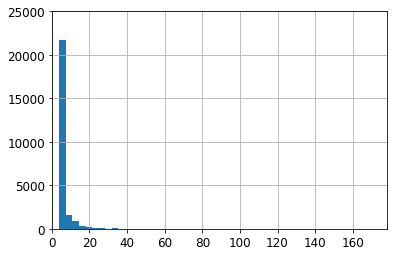

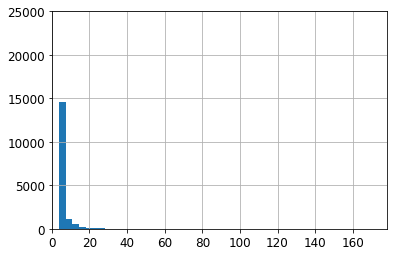

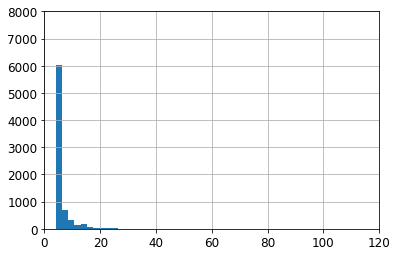

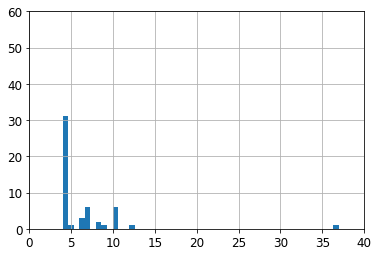

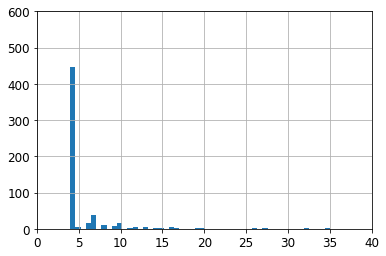

In [14]:
train.사고피해정도.hist(bins=50)
plt.axis([0,178, 0, 25000])
plt.show()

train_oneroad.사고피해정도.hist(bins=50)
plt.axis([0,178, 0, 25000])
plt.show()

train_cross.사고피해정도.hist(bins=50)
plt.axis([0,120, 0, 8000])
plt.show()

train_underpass.사고피해정도.hist(bins=50)
plt.axis([0,40, 0, 60])
plt.show()

train_etc.사고피해정도.hist(bins=50)
plt.axis([0,40, 0, 600])
plt.show()

In [15]:
train_oneroad_etc = train[train.도로형태 == "기타단일로"]

train_oneroad_etc["사고유형_대분류"].value_counts()

train_oneroad_etc["사고유형_중분류"].value_counts()

train_oneroad_etc["사고유형"].value_counts()

train_oneroad_etc["법규위반"].value_counts()

train_oneroad_etc["당사자종별_1당_대분류"].value_counts()

train_oneroad_etc["당사자종별_2당_대분류"].value_counts()

train_oneroad_etc["발생지시도"].value_counts()

train_oneroad_etc["주야"].value_counts()

train_oneroad_etc["요일"].value_counts()

화    2238
토    2220
목    2177
금    2170
월    2133
일    2039
수    2034
Name: 요일, dtype: int64

기타단일로? 터널안, 교량위, 고가도로위, 지하도로 내를 제외한 기타에 해당

No.7972 : 차량단독, 승합차, 사상자60명, 사고피해정도 178
[https://www.google.com/maps/place/34°53'51.5"N+128°34'20.2"E/@34.8978795,128.5715285,17.07z/data=!4m5!3m4!1s0x0:0x0!8m2!3d34.897637!4d128.57228](https://www.google.com/maps/place/34%C2%B053'51.5%22N+128%C2%B034'20.2%22E/@34.8978795,128.5715285,17.07z/data=!4m5!3m4!1s0x0:0x0!8m2!3d34.897637!4d128.57228)

주로 어떤 사고가 발생하는가?

-사고유형 대분류 기준<br>
차대사람(36.6%) > 차대차 (35.4%) > 차량단독(27.8%) 순<br><br>

-사고가 자주발생하는 사고차량타입은<br> 
승용차vs보행자(22.5%) 승용차vs없음(11.7%) 화물차vs보행자(8.2%)<br><br>

-사고피해정도 평균값이 높은<br> 
승합차vs승합차(46.46) 승합차vs건설기계(19.8) 승합차vs화물차(18.8)<br><br>

-사고피해정도 max값이 높은<br>
승합차vs없음(178) 승합차vs승합차(160) 승합차vs화물차(117) 승용차승합차(117)<br><br>


__사고가 빈번한 case는 승용차와 보행자이나
사고발생시 피해정도가 큰 case는 승합차와 화물차, 건설기계의 조합이다__

In [16]:
outlier = train[(train["경도"] < 124) & (train["위도"] < 33)]
outlier

## no.1972 경북 경주시인데 경위도가 잘못기입되어있다

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생지,사고피해정도,사고차량타입
1972,2016,2016122220,55,야간,목,1,1,0,0,0,경북,경주시,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,경형,보행자,보행자,0,0,117.992603,19.694477,경북경주시,4,승용차보행자


In [17]:
train = train.drop(1972,0)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


FileNotFoundError: [Errno 2] No such file or directory: './images/traffic_accident_project/better_visualization_plot.png'

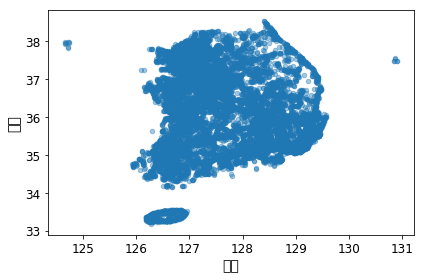

In [18]:
ax = train.plot(kind="scatter", x="경도", y="위도", alpha=0.4)
ax.set(xlabel='경도', ylabel='위도')
save_fig("better_visualization_plot")

In [20]:
#train_oneroad_etc.사고피해정도.hist(bins=50)
#plt.axis([0,178, 0, 25000])
#plt.show()

#train_cross_in = train_cross[(train_cross.도로형태 == "교차로내")]
#train_cross_around = train_cross[(train_cross.도로형태 == "교차로부근")]
train_oneroad_crosswalk = train[train.도로형태 == "횡단보도상"]
train_oneroad_crosswalk.shape

122/974

0.12525667351129363

In [21]:
train_oneroad_crosswalk.sort_values(by='사고피해정도', ascending=False)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생지,사고피해정도,사고차량타입
13155,2014,2014060918,32,야간,월,1,11,2,8,0,대전,서구,차대차,측면직각충돌,측면직각충돌,운전자법규위반,부당한 회전,단일로,횡단보도상,이륜차,소형,승합차,대형,986353,1814596,127.347948,36.328639,대전서구,26,이륜차승합차
22667,2012,2012062312,10,주간,토,2,5,1,2,0,서울,마포구,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,횡단보도상,승용차,중형,승용차,중형,951053,1950949,126.945823,37.556591,서울마포구,15,승용차승용차
12467,2014,2014080416,20,주간,월,2,5,1,2,0,경기,광명시,차대사람,횡단중,횡단중,운전자법규위반,신호위반,단일로,횡단보도상,화물차,중형,보행자,보행자,942376,1941311,126.848343,37.469221,경기광명시,15,화물차보행자
19704,2013,2013011712,47,주간,목,1,5,2,2,0,경기,구리시,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,단일로,횡단보도상,승합차,대형,보행자,보행자,967263,1955776,127.130811,37.601031,경기구리시,14,승합차보행자
20659,2012,2012110622,30,야간,화,1,6,0,5,0,서울,강북구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,단일로,횡단보도상,승합차,대형,보행자,보행자,958441,1960281,127.028937,37.641065,서울강북구,14,승합차보행자
24033,2012,2012032018,0,야간,화,1,5,2,2,0,인천,남구,차대사람,횡단중,횡단중,운전자법규위반,신호위반,단일로,횡단보도상,승용차,중형,보행자,보행자,925654,1941308,126.659254,37.468000,인천남구,14,승용차보행자
16273,2013,2013100717,0,주간,월,1,5,1,3,0,경기,파주시,차대사람,횡단중,횡단중,운전자법규위반,신호위반,단일로,횡단보도상,승용차,대형,보행자,보행자,937070,1985343,126.779633,37.862097,경기파주시,13,승용차보행자
2311,2016,2016112621,50,야간,토,3,3,0,0,0,경북,안동시,차량단독,전도전복,전도전복,운전자법규위반,안전운전 의무 불이행,단일로,횡단보도상,승용차,경형,없음,없음,1125277,1828257,128.897827,36.443709,경북안동시,12,승용차없음
13606,2014,2014050312,42,주간,토,1,4,1,2,0,경기,부천시,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,단일로,횡단보도상,승합차,대형,보행자,보행자,938209,1948323,126.800633,37.532151,경기부천시,11,승합차보행자
16883,2013,2013082408,23,주간,토,1,3,2,0,0,부산,해운대구,차대사람,횡단중,횡단중,운전자법규위반,신호위반,단일로,횡단보도상,화물차,소형,보행자,보행자,1154812,1688797,129.200240,35.182557,부산해운대구,10,화물차보행자


In [22]:
train_oneroad_crosswalk["사고차량타입"].value_counts() / len(train_oneroad_crosswalk)
train_oneroad_crosswalk.groupby("사고차량타입")['사고피해정도'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
사고차량타입,,,,,,,,
승용차보행자,506.0,4.310277,1.139990,4.0,4.0,4.0,4.00,14.0
화물차보행자,159.0,4.364780,1.284875,4.0,4.0,4.0,4.00,15.0
승합차보행자,122.0,4.450820,1.691508,4.0,4.0,4.0,4.00,14.0
건설기계보행자,28.0,4.071429,0.377964,4.0,4.0,4.0,4.00,6.0
이륜차보행자,25.0,5.680000,1.796292,4.0,4.0,6.0,7.00,10.0
승용차자전거,22.0,4.318182,0.838727,4.0,4.0,4.0,4.00,7.0
자전거승용차,14.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
승용차승용차,11.0,6.000000,3.549648,4.0,4.0,4.0,6.50,15.0
원동기장치자전거보행자,10.0,4.600000,0.966092,4.0,4.0,4.0,5.50,6.0


In [23]:
train_oneroad_crosswalk.groupby("사고차량타입")['사고피해정도'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
사고차량타입,,,,,,,,
이륜차승합차,3.0,12.666667,11.718931,4.0,6.0,8.0,17.00,26.0
승용차없음,1.0,12.000000,NaN,12.0,12.0,12.0,12.00,12.0
승용차승합차,1.0,7.000000,NaN,7.0,7.0,7.0,7.00,7.0
이륜차자전거,1.0,7.000000,NaN,7.0,7.0,7.0,7.00,7.0
승용차승용차,11.0,6.000000,3.549648,4.0,4.0,4.0,6.50,15.0
이륜차보행자,25.0,5.680000,1.796292,4.0,4.0,6.0,7.00,10.0
화물차이륜차,4.0,4.750000,1.500000,4.0,4.0,4.0,4.75,7.0
자전거보행자,3.0,4.666667,1.154701,4.0,4.0,4.0,5.00,6.0
원동기장치자전거보행자,10.0,4.600000,0.966092,4.0,4.0,4.0,5.50,6.0


In [24]:
train_oneroad_crosswalk.groupby("사고차량타입")['사고피해정도'].describe().sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
사고차량타입,,,,,,,,
이륜차승합차,3.0,12.666667,11.718931,4.0,6.0,8.0,17.00,26.0
화물차보행자,159.0,4.364780,1.284875,4.0,4.0,4.0,4.00,15.0
승용차승용차,11.0,6.000000,3.549648,4.0,4.0,4.0,6.50,15.0
승용차보행자,506.0,4.310277,1.139990,4.0,4.0,4.0,4.00,14.0
승합차보행자,122.0,4.450820,1.691508,4.0,4.0,4.0,4.00,14.0
승용차없음,1.0,12.000000,NaN,12.0,12.0,12.0,12.00,12.0
이륜차보행자,25.0,5.680000,1.796292,4.0,4.0,6.0,7.00,10.0
화물차이륜차,4.0,4.750000,1.500000,4.0,4.0,4.0,4.75,7.0
승용차승합차,1.0,7.000000,NaN,7.0,7.0,7.0,7.00,7.0


In [25]:
train_oneroad_etc_carperson = train_oneroad_etc[train_oneroad_etc.사고유형_대분류 == "차대사람"]

train_oneroad_etc_carperson.groupby("발생지시도")['발생지시군구'].describe()

,count,unique,top,freq
발생지시도,,,,
강원,231,18,원주시,47
경기,1002,31,수원시,90
경남,476,18,창원시(통합),95
경북,531,22,경주시,90
광주,161,5,북구,52
대구,210,8,수성구,34
대전,144,5,동구,37
부산,279,16,부산진구,33
서울,601,25,영등포구,41


In [26]:
train_oneroad_etc_kyunggi = train_oneroad_etc[train_oneroad_etc.발생지시도 == "경기"]

train_oneroad_etc_kyunggi["발생지시군구"].value_counts()

화성시     218
평택시     180
용인시     178
고양시     169
수원시     144
안산시     135
안성시     128
남양주시    127
성남시     119
파주시     119
포천시     119
이천시      98
시흥시      97
광주시      95
김포시      92
양평군      80
안양시      72
여주시      69
부천시      66
양주시      63
가평군      55
의정부시     49
광명시      39
연천군      38
하남시      35
동두천시     31
오산시      29
의왕시      26
군포시      26
구리시      21
과천시      11
Name: 발생지시군구, dtype: int64

In [27]:
train_oneroad_etc_kyunggi_hwasung = train_oneroad_etc_kyunggi[train_oneroad_etc_kyunggi.발생지시군구 == '화성시']

[Text(0,0.5,'위도'), Text(0.5,0,'경도')]

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


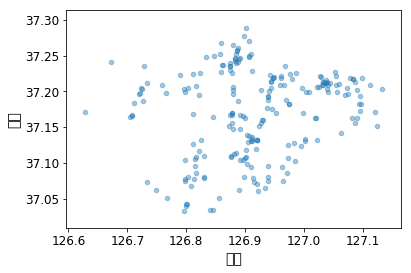

In [28]:
ax = train_oneroad_etc_kyunggi_hwasung.plot(kind="scatter", x="경도", y="위도", alpha=0.4)
ax.set(xlabel='경도', ylabel='위도')

In [29]:
train_oneroad_etc_kyunggi_hwasung["사고유형_대분류"].value_counts()

차대차     80
차량단독    73
차대사람    65
Name: 사고유형_대분류, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


FileNotFoundError: [Errno 2] No such file or directory: './images/traffic_accident_project/better_visualization_plot.png'

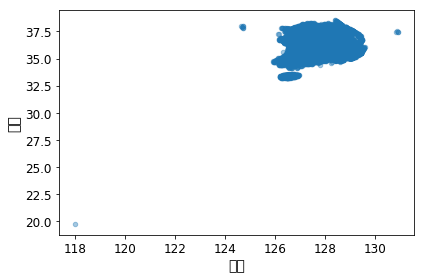

In [30]:
ax = train_oneroad_etc.plot(kind="scatter", x="경도", y="위도", alpha=0.4)
ax.set(xlabel='경도', ylabel='위도')
save_fig("better_visualization_plot")

In [31]:
train_oneroad_etc.shape

(15011, 30)

In [32]:
train_oneroad_bridge = train[train.도로형태 == "교량위"]

In [33]:
train_oneroad_tunnel = train[train.도로형태 == "터널안"]


In [34]:
train_oneroad_tunnel.shape

(143, 30)

In [35]:
train_oneroad_bridge.shape

(310, 30)

In [36]:
train_oneroad_tunnel.sort_values(by=['경도', '위도'], ascending=True)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생지,사고피해정도,사고차량타입
1368,2017,2017021407,15,주간,화,1,3,0,2,0,전남,무안군,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,승용차,승용차,화물차,화물차,908151,1667415,126.493759,34.995324,전남무안군,8,승용차화물차
2495,2016,2016111122,40,야간,금,1,1,0,0,0,전남,무안군,차량단독,공작물충돌,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,화물차,중형,없음,없음,908238,1665588,126.494657,34.981049,전남무안군,4,화물차없음
5859,2016,2016011114,0,주간,월,1,7,0,6,0,전남,무안군,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,승합차,대형,승용차,대형,908561,1657254,126.499109,34.905937,전남무안군,16,승합차승용차
5075,2016,2016033008,9,주간,수,1,1,0,0,0,전남,무안군,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,화물차,소형,특수차,대형,908576,1657024,126.499298,34.903865,전남무안군,4,화물차특수차
15778,2013,2013110817,45,주간,금,1,1,0,0,0,충남,보령시,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,화물차,소형,건설기계,건설기계,919710,1819844,126.604932,36.372695,충남보령시,4,화물차건설기계
20985,2012,2012101905,18,야간,금,1,1,0,0,0,인천,남구,차대차,측면직각충돌,측면직각충돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,승용차,중형,이륜차,소형,925649,1939851,126.659345,37.454868,인천남구,4,승용차이륜차
23386,2012,2012050308,0,주간,목,1,3,2,0,0,경기,김포시,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,터널안,화물차,소형,화물차,소형,928352,1962172,126.674852,37.665763,경기김포시,10,화물차화물차
17197,2013,2013073018,0,야간,화,1,1,0,0,0,경기,화성시,차대차,측면직각충돌,측면직각충돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,화물차,중형,농기계,농기계,929596,1910384,126.681172,37.190091,경기화성시,4,화물차농기계
8431,2015,2015062222,20,야간,월,1,1,0,0,0,인천,연수구,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,터널안,승용차,중형,이륜차,소형,929016,1936233,126.697758,37.422524,인천연수구,4,승용차이륜차
10571,2014,2014122003,16,야간,토,1,1,0,0,0,경기,고양시,차량단독,공작물충돌,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,화물차,소형,없음,없음,931228,1963147,126.720233,37.665261,경기고양시,4,화물차없음


In [37]:
train_oneroad_crosswalk["사고유형_대분류"].value_counts()/ len(train_oneroad_crosswalk)

train_oneroad_crosswalk["사고유형_중분류"].value_counts()/ len(train_oneroad_crosswalk)

train_oneroad_crosswalk["사고유형"].value_counts()/ len(train_oneroad_crosswalk)

train_oneroad_crosswalk["법규위반"].value_counts()/ len(train_oneroad_crosswalk)

train_oneroad_crosswalk["당사자종별_1당_대분류"].value_counts()/ len(train_oneroad_crosswalk)

train_oneroad_crosswalk["당사자종별_2당_대분류"].value_counts()/ len(train_oneroad_crosswalk)

train_oneroad_crosswalk["발생지시도"].value_counts()/ len(train_oneroad_crosswalk)

train_oneroad_crosswalk["주야"].value_counts()/ len(train_oneroad_crosswalk)

train_oneroad_crosswalk["요일"].value_counts()/ len(train_oneroad_crosswalk)

금    0.167351
월    0.155031
토    0.148871
화    0.144764
목    0.140657
수    0.140657
일    0.102669
Name: 요일, dtype: float64

In [38]:
train_oneroad_bridge.sort_values(by=['경도', '위도'], ascending=True)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생지,사고피해정도,사고차량타입
12388,2014,2014081208,49,주간,화,1,2,1,0,0,전남,목포시,차량단독,공작물충돌,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,교량위,승용차,중형,없음,없음,895854,1640311,126.362144,34.751956,전남목포시,7,승용차없음
3702,2016,2016080323,48,야간,수,1,1,0,0,0,전남,영광군,차대차,측면직각충돌,측면직각충돌,운전자법규위반,안전운전 의무 불이행,단일로,교량위,승용차,소형,이륜차,소형,902075,1708652,126.422032,35.368718,전남영광군,4,승용차이륜차
17141,2013,2013080412,15,주간,일,1,1,0,0,0,전남,무안군,차량단독,전도전복,전도전복,운전자법규위반,안전운전 의무 불이행,단일로,교량위,이륜차,소형,없음,없음,901756,1657641,126.424587,34.908790,전남무안군,4,이륜차없음
3544,2016,2016081907,0,주간,금,1,1,0,0,0,충남,서산시,차대차,정면충돌,정면충돌,운전자법규위반,중앙선 침범,단일로,교량위,승용차,중형,건설기계,건설기계,904509,1863073,126.430137,36.760951,충남서산시,4,승용차건설기계
15892,2013,2013110100,0,야간,금,1,1,0,0,0,인천,옹진군,차대사람,길가장자리구역통행중,길가장자리구역통행중,운전자법규위반,안전운전 의무 불이행,단일로,교량위,승용차,소형,보행자,보행자,911545,1917813,126.502529,37.255008,인천옹진군,4,승용차보행자
4988,2016,2016040708,40,주간,목,1,1,0,0,0,충남,보령시,차량단독,도로이탈,도로이탈 추락,운전자법규위반,안전운전 의무 불이행,단일로,교량위,승용차,소형,없음,없음,914315,1833176,126.543323,36.492405,충남보령시,4,승용차없음
5569,2016,2016020704,33,야간,일,1,8,0,7,0,인천,연수구,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,교량위,승용차,소형,승용차,중형,915704,1936754,126.547268,37.426103,인천연수구,18,승용차승용차
22639,2012,2012062518,9,야간,월,1,1,0,0,0,충남,홍성군,차량단독,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,교량위,자전거,자전거,없음,없음,915665,1838591,126.557802,36.541335,충남홍성군,4,자전거없음
8649,2015,2015060421,10,야간,목,1,1,0,0,0,인천,연수구,차대차,추돌,주정차중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,교량위,화물차,소형,승용차,중형,918240,1934841,126.576139,37.409089,인천연수구,4,화물차승용차
17736,2013,2013062111,0,주간,금,2,4,0,2,0,충남,홍성군,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,교량위,화물차,중형,화물차,중형,917444,1840986,126.577419,36.563079,충남홍성군,12,화물차화물차


In [39]:
train_oneroad_bridge["사고유형_대분류"].value_counts()/ len(train_oneroad_bridge)

train_oneroad_bridge["사고유형_중분류"].value_counts()/ len(train_oneroad_bridge)

train_oneroad_bridge["사고유형"].value_counts()/ len(train_oneroad_bridge)

train_oneroad_bridge["법규위반"].value_counts()/ len(train_oneroad_bridge)

train_oneroad_bridge["당사자종별_1당_대분류"].value_counts()/ len(train_oneroad_bridge)

train_oneroad_bridge["당사자종별_2당_대분류"].value_counts()/ len(train_oneroad_bridge)

train_oneroad_bridge["발생지시도"].value_counts()/ len(train_oneroad_bridge)

train_oneroad_bridge["주야"].value_counts()/ len(train_oneroad_bridge)

train_oneroad_bridge["요일"].value_counts()/ len(train_oneroad_bridge)

토    0.170968
목    0.145161
월    0.145161
수    0.141935
화    0.138710
일    0.135484
금    0.122581
Name: 요일, dtype: float64

[Text(0,0.5,'위도'), Text(0.5,0,'경도')]

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


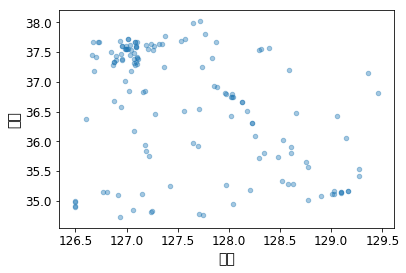

In [40]:
ax = train_oneroad_tunnel.plot(kind="scatter", x="경도", y="위도", alpha=0.4)
ax.set(xlabel='경도', ylabel='위도')

__차대차가 62.9프로 정도로 많이 발생하고 보통 터널안에서 추돌사고가 원인이다<br>
화물차가 1당,2당 대분류 모두 2위이며 2당_대분류 1위는 피해자없는 차량단독사고의 경우이다__<br><br>

__특이한 점은 요일기준으로 목요일과 수요일은 1일차이이지만 사망사고발생확률에선 차이가 많이난다<br>
월~수요일까지의 피로도 누적으로 목 > 금 > 토일에 사고가 많이 발생하는 것으로 해석된다__

[Text(0,0.5,'위도'), Text(0.5,0,'경도')]

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


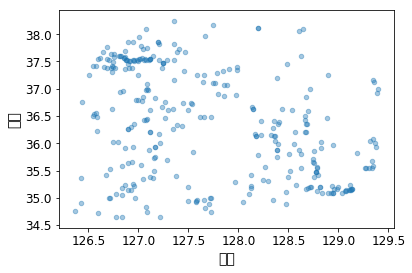

In [41]:
ax = train_oneroad_bridge.plot(kind="scatter", x="경도", y="위도", alpha=0.4)
ax.set(xlabel='경도', ylabel='위도')

__교량위에선 차대차가 많이 발생하나 차량단독 사고도 터널보다는 비율이 높다
터널안과 마찬가지로 추돌, 기타, 공작물충돌 순서로 사고유형이 나타나고__

__특이점은 경북지역에서 교량사고가 많이 발생한다는 것__
__터널과는 다르게 야간, 토요일에 많이 발생한다__

In [42]:
train_cross_in = train_cross[(train_cross.도로형태 == "교차로내")]
train_cross_around = train_cross[(train_cross.도로형태 == "교차로부근")]

In [43]:
train_cross_cross = train_cross[(train_cross.도로형태 == "교차로내")|(train_cross.도로형태 == "교차로부근")]

In [44]:
train_cross_cross.shape

(7455, 30)

In [45]:
train_cross_cross["사고유형_대분류"].value_counts()/ len(train_cross_cross)

train_cross_cross["사고유형_중분류"].value_counts()/ len(train_cross_cross)

train_cross_cross["사고유형"].value_counts()/ len(train_cross_cross)

train_cross_cross["법규위반"].value_counts()/ len(train_cross_cross)

train_cross_cross["당사자종별_1당_대분류"].value_counts()/ len(train_cross_cross)

train_cross_cross["당사자종별_2당_대분류"].value_counts()/ len(train_cross_cross)

train_cross_cross["발생지시도"].value_counts()/ len(train_cross_cross)

train_cross_cross["주야"].value_counts()/ len(train_cross_cross)

train_cross_cross["요일"].value_counts()/ len(train_cross_cross)

월    0.156271
금    0.155064
수    0.150905
토    0.143662
화    0.142991
목    0.138028
일    0.113078
Name: 요일, dtype: float64

__교차로내이다보니 보행자가 포함되는 사고가 잦다
건설기계가 사고에 연관되면(피해자, 가해자) 평균적인 사고피해정도가 높게 나타난다__

In [46]:
def load_supplement_data(accident_path=SUPPLEMENT_PATH):
    xlsx_path = os.path.join(accident_path, "서울시 도로링크별 교통사고(2015~2017).xlsx")
    return pd.read_excel(xlsx_path, encoding='euc-kr')    

In [47]:
road_to_link = load_supplement_data()

In [48]:
road_to_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 13 columns):
링크ID      21575 non-null int64
위험도       21575 non-null float64
위험등급      21575 non-null int64
시군구       21575 non-null object
읍면동       21575 non-null object
도로명       21575 non-null object
도로길이_m    21575 non-null int64
차로수_편도    21575 non-null int64
사고건수      21575 non-null int64
사망자수      21575 non-null int64
중상자수      21575 non-null int64
경상자수      21575 non-null int64
부상신고자수    21575 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 2.1+ MB


In [49]:
road_to_link.describe()

,링크ID,위험도,위험등급,도로길이_m,차로수_편도,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,2.157500e+04,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000
mean,1.138236e+09,4.743824,1.520324,273.984009,2.039027,5.197729,0.049502,1.732885,4.946837,0.732283
std,1.218237e+08,11.392928,0.890939,283.081394,1.192494,7.103959,0.242543,2.703956,7.607120,1.461944
min,1.000000e+09,0.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070005e+09,0.040000,1.000000,113.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.140017e+09,0.830000,1.000000,205.000000,2.000000,3.000000,0.000000,1.000000,2.000000,0.000000
75%,1.200002e+09,4.190000,2.000000,345.000000,3.000000,7.000000,0.000000,2.000000,6.000000,1.000000
max,2.340044e+09,502.810000,4.000000,6738.000000,7.000000,90.000000,4.000000,36.000000,150.000000,26.000000


In [50]:
high_risk_roadlink = road_to_link[(road_to_link.위험등급 == 4)]

In [51]:
low_risk_roadlink = road_to_link[(road_to_link.위험등급 == 1)]

In [52]:
high_risk_roadlink.head(11)

,링크ID,위험도,위험등급,시군구,읍면동,도로명,도로길이_m,차로수_편도,사고건수,사망자수,중상자수,경상자수,부상신고자수
35,1220002202,36.89,4,강남구,대치동,영동대로,544,4,43,0,10,46,11
38,1220002700,37.77,4,강남구,대치동,영동대로,512,4,29,1,13,37,5
49,1220003402,21.64,4,강남구,삼성동,영동대로,511,7,25,0,8,31,2
50,1220003403,32.12,4,강남구,삼성동,영동대로,139,7,10,0,7,7,0
57,1220004201,30.70,4,강남구,청담동,영동대로,446,7,27,0,10,29,4
60,1220004304,20.74,4,강남구,청담동,영동대로,386,7,25,0,6,40,5
62,1220004402,15.41,4,강남구,청담동,올림픽대로,805,4,33,0,6,51,6
70,1220005402,7.28,4,강남구,청담동,올림픽대로,537,4,15,0,4,26,1
71,1220005502,7.61,4,강남구,청담동,올림픽대로,1105,5,25,0,6,36,6
73,1220005701,15.10,4,강남구,압구정동,올림픽대로,702,4,21,0,8,35,3


In [53]:
high_risk_roadlink.describe()

,링크ID,위험도,위험등급,도로길이_m,차로수_편도,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,1.423000e+03,1423.000000,1423.0,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000
mean,1.136495e+09,36.812748,4.0,359.205903,3.113844,21.543219,0.251581,8.427969,21.072382,2.905833
std,1.153545e+08,25.405003,0.0,385.043904,1.272217,12.915529,0.556217,4.486608,15.458659,3.084987
min,1.000000e+09,7.010000,4.0,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.050020e+09,22.765000,4.0,147.500000,2.000000,12.000000,0.000000,5.000000,10.000000,1.000000
50%,1.140018e+09,29.780000,4.0,268.000000,3.000000,19.000000,0.000000,8.000000,18.000000,2.000000
75%,1.200027e+09,43.880000,4.0,459.000000,4.000000,28.000000,0.000000,11.000000,28.000000,4.000000
max,2.270041e+09,502.810000,4.0,5270.000000,7.000000,90.000000,4.000000,36.000000,150.000000,26.000000


## 위험도가 높은 상위 10개 도로분석

__남부순환로와 종로를 제외하고 도로길이가 200m 이하이다 (평균 273.984009)__
지도상으로는 중심지인것만 알수있고 뚜렷한 특징은 알수없다 

__지적편집도를 통해서 해당도로를 보면 일반주거지역과 상업지역이 만나거나 경계를 같이하는 특징__<br>
__주거지- 상업지역 사이의 인구 왕래가 잦고 상업지역은 보통 중심지에 형성되어서 인구밀도도 높다__


- 네이버 지적편집도

  하정로 : 제2종일반주거지역에 위치 12시 방향 일반상업지역과 만남
  덕릉로 : 제2종일반주거지역이나 가운데 일반상업지역을 지나감

  [https://map.naver.com/?mapmode=0&lng=e62229fc841a6f96a1a03e83d687bcf0&pinId=18838965&lat=6f183639161f393fb10c543826c08347&dlevel=11&enc=b64&pinType=site](https://map.naver.com/?mapmode=0&lng=e62229fc841a6f96a1a03e83d687bcf0&pinId=18838965&lat=6f183639161f393fb10c543826c08347&dlevel=11&enc=b64&pinType=site)

  천호대로 : 제2종일반주거지역과 일반상업지역의 경계

  [https://map.naver.com/?mapmode=0&lng=e62229fc841a6f96a1a03e83d687bcf0&pinId=18838965&lat=6f183639161f393fb10c543826c08347&dlevel=11&enc=b64&pinType=site](https://map.naver.com/?mapmode=0&lng=e62229fc841a6f96a1a03e83d687bcf0&pinId=18838965&lat=6f183639161f393fb10c543826c08347&dlevel=11&enc=b64&pinType=site)

  남부순환로 : 제2종일반주거지역이나 가운데 일반상업지역을 지나감

  [https://map.naver.com/?mapmode=0&lng=e62229fc841a6f96a1a03e83d687bcf0&pinId=18838965&lat=6f183639161f393fb10c543826c08347&dlevel=11&enc=b64&pinType=site](https://map.naver.com/?mapmode=0&lng=e62229fc841a6f96a1a03e83d687bcf0&pinId=18838965&lat=6f183639161f393fb10c543826c08347&dlevel=11&enc=b64&pinType=site)

  종로 : 일반상업지역이나 제3종일반주거지역과 경계
  중대로 :  제2종일반주거지역과 일반상업지역의 만나는 곳 (7시)
  당산로 : 준주거지역과 일반상업지역의 교차지점
  선유로 :  준공업지역?
  미아동 도봉로 : 제2종 일반주거지역

In [54]:
low_risk_roadlink.describe()

,링크ID,위험도,위험등급,도로길이_m,차로수_편도,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,1.479600e+04,14796.000000,14796.0,14796.000000,14796.000000,14796.000000,14796.00000,14796.000000,14796.000000,14796.000000
mean,1.140258e+09,0.581992,1.0,259.076440,1.748648,2.170519,0.00561,0.530616,2.027372,0.340024
std,1.285072e+08,0.771459,0.0,260.265213,1.029876,2.363700,0.07469,0.796797,2.578591,0.756825
min,1.000000e+09,0.000000,1.0,7.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.070020e+09,0.000000,1.0,107.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.140031e+09,0.200000,1.0,195.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000
75%,1.190033e+09,0.920000,1.0,321.000000,2.000000,3.000000,0.00000,1.000000,3.000000,0.000000
max,2.340044e+09,2.990000,1.0,5115.000000,7.000000,18.000000,1.00000,7.000000,20.000000,13.000000


## 위험등급에 따라 고위험도로(4) 와 저위험도로(1)로 비교

__전체 count 는 저위험도로가 고위험도로보다 10배정도 많다
도로길이 평균 저위험도로가 259m 고위험도로가 359m 정도로 100m 정도 차이난다__<br>
__차로수_편도는 각각 1.74 , 3.11 로 고위험도로가 더 높다
평균 사고건수는 고위험도로가 10배정도 많다__